# BC카드

# 전처리

In [1]:
# import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
%matplotlib inline

['NanumGothic']


In [9]:
# BC카드
# 2019 ~ 2020년 데이터 합산
tradeList_201904 = pd.read_csv('./비씨카드/거래내역_201904.csv', encoding='CP949')
tradeList_201905 = pd.read_csv('./비씨카드/거래내역_201905.csv', encoding='CP949')
tradeList_202004 = pd.read_csv('./비씨카드/거래내역_202004.csv', encoding='CP949')
tradeList_202005 = pd.read_csv('./비씨카드/거래내역_202005.csv', encoding='CP949')
tradeList = pd.concat([tradeList_201904, tradeList_201905, tradeList_202004, tradeList_202005], ignore_index=True)
tradeList

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463
...,...,...,...,...,...,...,...,...,...,...
4194295,20200522,15015,15015,1988,30,M,5,4010,0.0,8573
4194296,20200522,39196,39196,1960,60,F,9,4020,0.0,13150
4194297,20200522,48106,48109,1968,50,F,5,4004,0.0,39285
4194298,20200522,37558,37558,1968,50,F,9,4020,0.0,12743


In [3]:
# 우편번호 합산
post_1 = pd.read_csv('./우편번호검색/강원도.csv', encoding='CP949')
post_2 = pd.read_csv('./우편번호검색/경기도.csv', encoding='CP949')
post_3 = pd.read_csv('./우편번호검색/경상남도.csv', encoding='CP949')
post_4 = pd.read_csv('./우편번호검색/경상북도.csv', encoding='CP949')
post_5 = pd.read_csv('./우편번호검색/광주.csv', encoding='CP949')
post_6 = pd.read_csv('./우편번호검색/대구.csv', encoding='CP949')
post_7 = pd.read_csv('./우편번호검색/대전.csv', encoding='CP949')
post_8 = pd.read_csv('./우편번호검색/부산.csv', encoding='CP949')
post_9 = pd.read_csv('./우편번호검색/서울.csv', encoding='CP949')
post_10 = pd.read_csv('./우편번호검색/세종.csv', encoding='CP949')
post_11 = pd.read_csv('./우편번호검색/울산.csv', encoding='CP949')
post_12 = pd.read_csv('./우편번호검색/인천.csv', encoding='CP949')
post_13 = pd.read_csv('./우편번호검색/전라.csv', encoding='CP949')
post_14 = pd.read_csv('./우편번호검색/제주.csv', encoding='CP949')
post_15 = pd.read_csv('./우편번호검색/충청남도,북도.csv', encoding='CP949')

post = pd.concat([post_1, post_2, post_3, post_4, post_5,
                  post_6, post_7, post_8, post_9, post_10,
                  post_11, post_12, post_13, post_14, post_15], ignore_index=True)
post

,우편번호,시도,시군구,읍면,도로명코드,도로명,지하여부,건물번호본번,건물번호부번,건물관리번호,...,법정동코드,법정동명,리명,행정동명,산여부,지번본번,읍면동일련번호,지번부번,구우편번호,우편번호일
0,25627,강원도,강릉시,강동면,421503220032,율곡로,0,2085,10,4215034022003590001038558,...,4215034022,NaN,모전리,강동면,0,359,10,1,NaN,NaN
1,25627,강원도,강릉시,강동면,421504460014,강동초교길,0,1,0,4215034022003730002038834,...,4215034022,NaN,모전리,강동면,0,373,1,2,NaN,NaN
2,25627,강원도,강릉시,강동면,421503220011,단경로,0,20,0,4215034022003840000038573,...,4215034022,NaN,모전리,강동면,0,319,1,1,NaN,NaN
3,25627,강원도,강릉시,강동면,421503220011,단경로,0,54,0,4215034022003400007045053,...,4215034022,NaN,모전리,강동면,0,340,1,7,NaN,NaN
4,25627,강원도,강릉시,강동면,421504460640,아래장작골길,0,68,0,4215034022102580002000001,...,4215034022,NaN,모전리,강동면,0,258,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326016,28006,충청북도,괴산군,감물면,437603014054,충민로,0,694,13,4376031026101180000000001,...,4376031026,NaN,광전리,감물면,0,118,2,0,NaN,NaN
6326017,28006,충청북도,괴산군,감물면,437603014054,충민로,0,749,0,4376031026100860008100700,...,4376031026,NaN,광전리,감물면,0,86,2,8,NaN,NaN
6326018,28006,충청북도,괴산군,감물면,437604538067,광전5길,0,51,10,4376031026104470000100087,...,4376031026,NaN,광전리,NaN,0,447,1,0,NaN,NaN
6326019,28006,충청북도,괴산군,감물면,437604538067,광전5길,0,51,12,4376031026104450002101951,...,4376031026,NaN,광전리,NaN,0,446,1,0,NaN,NaN


In [4]:
# 행정구역별 우편번호 분류
district_post = []
for i in post['시도'].unique():
    List = np.sort(post[post['시도']==i]['우편번호'].unique())
    
    postNum = []
    postNum.append(List[0])
    postNum.append(List[-1])
    
    district_post.append(postNum)
    print(i, '\t우편번호 : ', List[0], ' ~ ', List[-1])

강원도 	우편번호 :  24000  ~  26509
경기도 	우편번호 :  10000  ~  18635
경상남도 	우편번호 :  50000  ~  53337
경상북도 	우편번호 :  36000  ~  40240
광주광역시 	우편번호 :  61000  ~  62466
대구광역시 	우편번호 :  41000  ~  43024
대전광역시 	우편번호 :  34000  ~  35428
부산광역시 	우편번호 :  46000  ~  49527
서울특별시 	우편번호 :  1000  ~  8866
세종특별자치시 	우편번호 :  30000  ~  30154
울산광역시 	우편번호 :  44000  ~  45015
인천광역시 	우편번호 :  21000  ~  23136
전라북도 	우편번호 :  54000  ~  56469
전라남도 	우편번호 :  57000  ~  59792
제주특별자치도 	우편번호 :  63000  ~  63644
충청북도 	우편번호 :  27000  ~  29167
충청남도 	우편번호 :  31000  ~  33677


In [5]:
# 행정구역 리스트
district = post['시도'].unique()
district

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라북도', '전라남도', '제주특별자치도',
       '충청북도', '충청남도'], dtype=object)

In [10]:
# 우편번호에 해당하는 행정구역 컬럼 생성
tradeList['행정구역'] = tradeList['가맹점신우편번호'].apply(lambda x: 
                                              district[0] if district_post[0][0] <= x <= district_post[0][1] else(
                                              district[1] if district_post[1][0] <= x <= district_post[1][1] else(
                                              district[2] if district_post[2][0] <= x <= district_post[2][1] else(
                                              district[3] if district_post[3][0] <= x <= district_post[3][1] else(
                                              district[4] if district_post[4][0] <= x <= district_post[4][1] else(
                                              district[5] if district_post[5][0] <= x <= district_post[5][1] else(
                                              district[6] if district_post[6][0] <= x <= district_post[6][1] else(
                                              district[7] if district_post[7][0] <= x <= district_post[7][1] else(
                                              district[8] if district_post[8][0] <= x <= district_post[8][1] else(
                                              district[9] if district_post[9][0] <= x <= district_post[9][1] else(
                                              district[10] if district_post[10][0] <= x <= district_post[10][1] else(
                                              district[11] if district_post[11][0] <= x <= district_post[11][1] else(
                                              district[12] if district_post[12][0] <= x <= district_post[12][1] else(
                                              district[13] if district_post[13][0] <= x <= district_post[13][1] else(
                                              district[14] if district_post[14][0] <= x <= district_post[14][1] else(
                                              district[15] if district_post[15][0] <= x <= district_post[15][1] else(
                                              district[16] if district_post[16][0] <= x <= district_post[16][1] else 0)))))))))))))))))

In [11]:
tradeList

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,행정구역
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180,서울특별시
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620,서울특별시
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000,서울특별시
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588,서울특별시
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...
4194295,20200522,15015,15015,1988,30,M,5,4010,0.0,8573,경기도
4194296,20200522,39196,39196,1960,60,F,9,4020,0.0,13150,경상북도
4194297,20200522,48106,48109,1968,50,F,5,4004,0.0,39285,부산광역시
4194298,20200522,37558,37558,1968,50,F,9,4020,0.0,12743,경상북도


In [12]:
# 매출금액 마이너스값 확인
tradeList[tradeList['매출금액'] <= 0]


# 매출금액 마이너스값 제거
drop_index = tradeList[tradeList['매출금액'] <= 0].index
tradeList.drop(drop_index, inplace=True)


tradeList

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,행정구역
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180,서울특별시
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620,서울특별시
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000,서울특별시
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588,서울특별시
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...
4194295,20200522,15015,15015,1988,30,M,5,4010,0.0,8573,경기도
4194296,20200522,39196,39196,1960,60,F,9,4020,0.0,13150,경상북도
4194297,20200522,48106,48109,1968,50,F,5,4004,0.0,39285,부산광역시
4194298,20200522,37558,37558,1968,50,F,9,4020,0.0,12743,경상북도


In [14]:
# 업종코드 불러오기
Industry = pd.read_csv('./비씨카드/업종코드.csv', encoding='CP949')
Industry.rename(columns={'업종코드':'가맹점업종코드', '업종명':'세부업종명'}, inplace = True)
Industry

,가맹점업종코드,세부업종명
0,9999,기타업종
1,9998,기타전문점
2,9996,비씨카드정산용(할인)
3,9995,비씨카드정산용
4,9993,외국인전용가맹점
...,...,...
341,1020,기타숙박업
342,1010,콘도
343,1003,2급 호텔
344,1002,1급 호텔


In [15]:
# 세부업종명 컬럼 조인
tradeList = pd.merge(tradeList, Industry, on='가맹점업종코드', how='left')
tradeList

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,행정구역,세부업종명
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180,서울특별시,기타전문점
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620,서울특별시,기타전문점
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000,서울특별시,기타전문점
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588,서울특별시,기타전문점
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463,서울특별시,기타전문점
...,...,...,...,...,...,...,...,...,...,...,...,...
4194206,20200522,15015,15015,1988,30,M,5,4010,0.0,8573,경기도,편 의 점
4194207,20200522,39196,39196,1960,60,F,9,4020,0.0,13150,경상북도,슈퍼 마켓
4194208,20200522,48106,48109,1968,50,F,5,4004,0.0,39285,부산광역시,대형할인점
4194209,20200522,37558,37558,1968,50,F,9,4020,0.0,12743,경상북도,슈퍼 마켓


In [44]:
business = pd.read_csv('업종분류.csv', encoding='CP949')
business.drop(['세부업종명'], axis=1, inplace=True)
business

,가맹점업종코드,중분류,대분류
0,9998,기타,기타
1,9911,기타,기타
2,9910,기타,기타
3,9901,기타,기타
4,9699,농업,외식
...,...,...,...
163,1110,교통,교통
164,1101,교통,교통
165,1020,숙박,숙박
166,1010,숙박,숙박


In [46]:
df = pd.merge(tradeList, business, on='가맹점업종코드', how='left')
df

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,행정구역,세부업종명,중분류,대분류
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180,서울특별시,기타전문점,기타,기타
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620,서울특별시,기타전문점,기타,기타
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000,서울특별시,기타전문점,기타,기타
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588,서울특별시,기타전문점,기타,기타
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463,서울특별시,기타전문점,기타,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194206,20200522,15015,15015,1988,30,M,5,4010,0.0,8573,경기도,편 의 점,유통,생활
4194207,20200522,39196,39196,1960,60,F,9,4020,0.0,13150,경상북도,슈퍼 마켓,유통,생활
4194208,20200522,48106,48109,1968,50,F,5,4004,0.0,39285,부산광역시,대형할인점,유통,생활
4194209,20200522,37558,37558,1968,50,F,9,4020,0.0,12743,경상북도,슈퍼 마켓,유통,생활


In [47]:
# 컬럼 제거 및 이름 변경
# 제거 컬럼 : 가맹점신우편번호, 고객신우편번호, 생년, 매출구분코드, 가맹점업종코드, 할부개월수
df.drop(['가맹점신우편번호', '고객신우편번호', '생년', '매출구분코드', '가맹점업종코드', '할부개월수'], axis=1, inplace=True)
df.rename(columns={'기준일자':'날짜', '연령대코드':'나이', '성별코드':'성별'}, inplace = True)

df

,날짜,나이,성별,매출금액,행정구역,세부업종명,중분류,대분류
0,20190401,25,M,128180,서울특별시,기타전문점,기타,기타
1,20190401,20,F,14620,서울특별시,기타전문점,기타,기타
2,20190401,20,M,32000,서울특별시,기타전문점,기타,기타
3,20190401,60,F,17588,서울특별시,기타전문점,기타,기타
4,20190401,30,F,41463,서울특별시,기타전문점,기타,기타
...,...,...,...,...,...,...,...,...
4194206,20200522,30,M,8573,경기도,편 의 점,유통,생활
4194207,20200522,60,F,13150,경상북도,슈퍼 마켓,유통,생활
4194208,20200522,50,F,39285,부산광역시,대형할인점,유통,생활
4194209,20200522,50,F,12743,경상북도,슈퍼 마켓,유통,생활


In [155]:
BC = df[['날짜', '행정구역', '대분류', '중분류', '세부업종명', '나이', '성별', '매출금액']]
BC

,날짜,행정구역,대분류,중분류,세부업종명,나이,성별,매출금액
0,20190401,서울특별시,기타,기타,기타전문점,25,M,128180
1,20190401,서울특별시,기타,기타,기타전문점,20,F,14620
2,20190401,서울특별시,기타,기타,기타전문점,20,M,32000
3,20190401,서울특별시,기타,기타,기타전문점,60,F,17588
4,20190401,서울특별시,기타,기타,기타전문점,30,F,41463
...,...,...,...,...,...,...,...,...
4194206,20200522,경기도,생활,유통,편 의 점,30,M,8573
4194207,20200522,경상북도,생활,유통,슈퍼 마켓,60,F,13150
4194208,20200522,부산광역시,생활,유통,대형할인점,50,F,39285
4194209,20200522,경상북도,생활,유통,슈퍼 마켓,50,F,12743


In [156]:
# [20190406, 20190407, 20190413, 20190414, 20190420, 20190421, 20190427, 20190428, 20190504, 20190505, 20190511, 20190512, 20190518, 20190519]
# [20200404, 20200405, 20200411, 20200412, 20200418, 20200419, 20200502, 20200503, 20200509, 20200510, 20200516, 20200517]
BC['주말'] = BC['날짜'].apply(lambda x: 
                           1 if x == 20190406 else (
                           1 if x == 20190407 else (
                           1 if x == 20190413 else (
                           1 if x == 20190414 else (
                           1 if x == 20190420 else (
                           1 if x == 20190421 else (
                           1 if x == 20190427 else (
                           1 if x == 20190428 else (
                           1 if x == 20190504 else (
                           1 if x == 20190505 else (
                           1 if x == 20190511 else (
                           1 if x == 20190512 else (
                           1 if x == 20190518 else (
                           1 if x == 20190519 else (
                           1 if x == 20190525 else (
                           1 if x == 20190526 else (

                           1 if x == 20200404 else (
                           1 if x == 20200405 else (
                           1 if x == 20200411 else (
                           1 if x == 20200412 else (
                           1 if x == 20200418 else (
                           1 if x == 20200419 else (
                           1 if x == 20200425 else (
                           1 if x == 20200426 else (
                           1 if x == 20200502 else (
                           1 if x == 20200503 else (
                           1 if x == 20200509 else (
                           1 if x == 20200510 else (
                           1 if x == 20200516 else (
                           1 if x == 20200517 else (
                           1 if x == 20200523 else (
                           1 if x == 20200524 else (
                           1 if x == 20200530 else (
                           1 if x == 20200531 else 0))))))))))))))))))))))))))))))))))

BC['연도별'] = BC['날짜'].apply(lambda x: '2019년' if x < 20200400 else '2020년')

BC['월별'] = BC['날짜'].apply(lambda x:
                          '04월' if x < 20190500 else(
                          '05월' if x < 20200400 else(
                          '04월' if x < 20200500 else 
                          '05월' )))

BC['일별'] = BC['날짜'].apply(lambda x: str(x)[4:])

BC['성별'] = BC['성별'].apply(lambda x: 1 if x =='M' else 0)

BC['나이'] = BC['나이'].apply(lambda x: 1 if x < 20 else (
    2 if x < 30 else (
    3 if x < 40 else (
    4 if x < 50 else (
    5 if x < 60 else (
    6 if x < 70 else 7))))))

print('완료')

완료


In [157]:
BC

,날짜,행정구역,대분류,중분류,세부업종명,나이,성별,매출금액,주말,연도별,월별,일별
0,20190401,서울특별시,기타,기타,기타전문점,2,1,128180,0,2019년,04월,0401
1,20190401,서울특별시,기타,기타,기타전문점,2,0,14620,0,2019년,04월,0401
2,20190401,서울특별시,기타,기타,기타전문점,2,1,32000,0,2019년,04월,0401
3,20190401,서울특별시,기타,기타,기타전문점,6,0,17588,0,2019년,04월,0401
4,20190401,서울특별시,기타,기타,기타전문점,3,0,41463,0,2019년,04월,0401
...,...,...,...,...,...,...,...,...,...,...,...,...
4194206,20200522,경기도,생활,유통,편 의 점,3,1,8573,0,2020년,05월,0522
4194207,20200522,경상북도,생활,유통,슈퍼 마켓,6,0,13150,0,2020년,05월,0522
4194208,20200522,부산광역시,생활,유통,대형할인점,5,0,39285,0,2020년,05월,0522
4194209,20200522,경상북도,생활,유통,슈퍼 마켓,5,0,12743,0,2020년,05월,0522


# 1) 전체 매출액 변화 추이

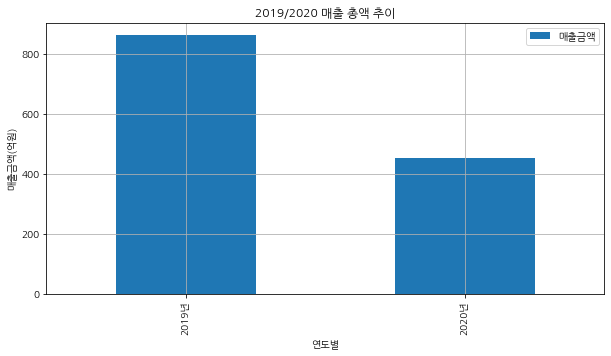

In [451]:
# 1) 2019/2020 추이
(BC[['연도별', '매출금액']].groupby('연도별').sum()/100000000).plot(figsize=(10, 5), kind='bar', grid='on', ylabel='매출금액(억원)').set_title('2019/2020 매출 총액 추이')
plt.savefig('./IMG/1. 연도별 매출액 변화 추이.png')

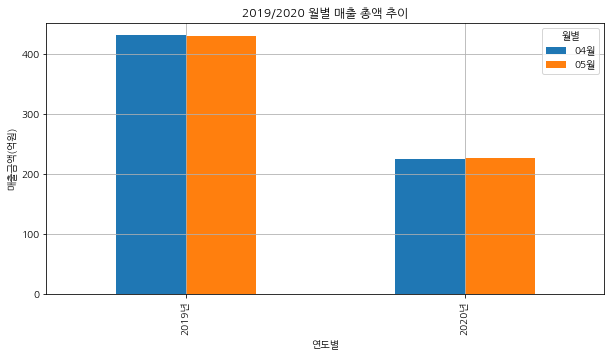

In [452]:
# 2) 2019/2020 월별 매출액 추이
(BC[['연도별', '월별', '매출금액']].groupby(['연도별', '월별'])['매출금액'].sum()/100000000).unstack().plot(figsize=(10, 5), kind='bar', grid='on', ylabel='매출금액(억원)').set_title('2019/2020 월별 매출 총액 추이')
plt.savefig('./IMG/2. 월별 매출액 변화 추이.png')

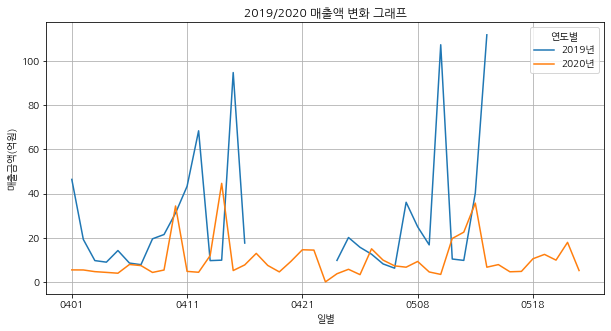

In [453]:
# 3) 2019 ~ 2020 일별 매출액 변화 추이
(BC[['연도별', '일별', '매출금액']].groupby(['연도별', '일별'])['매출금액'].sum()/100000000).unstack().unstack().unstack().plot(figsize=(10, 5), grid='on', ylabel='매출금액(억원)').set_title('2019/2020 매출액 변화 그래프')
plt.savefig('./IMG/3. 일별 매출액 변화 추이.png')

# 2) 지역별 전체 매출액 변화 추이

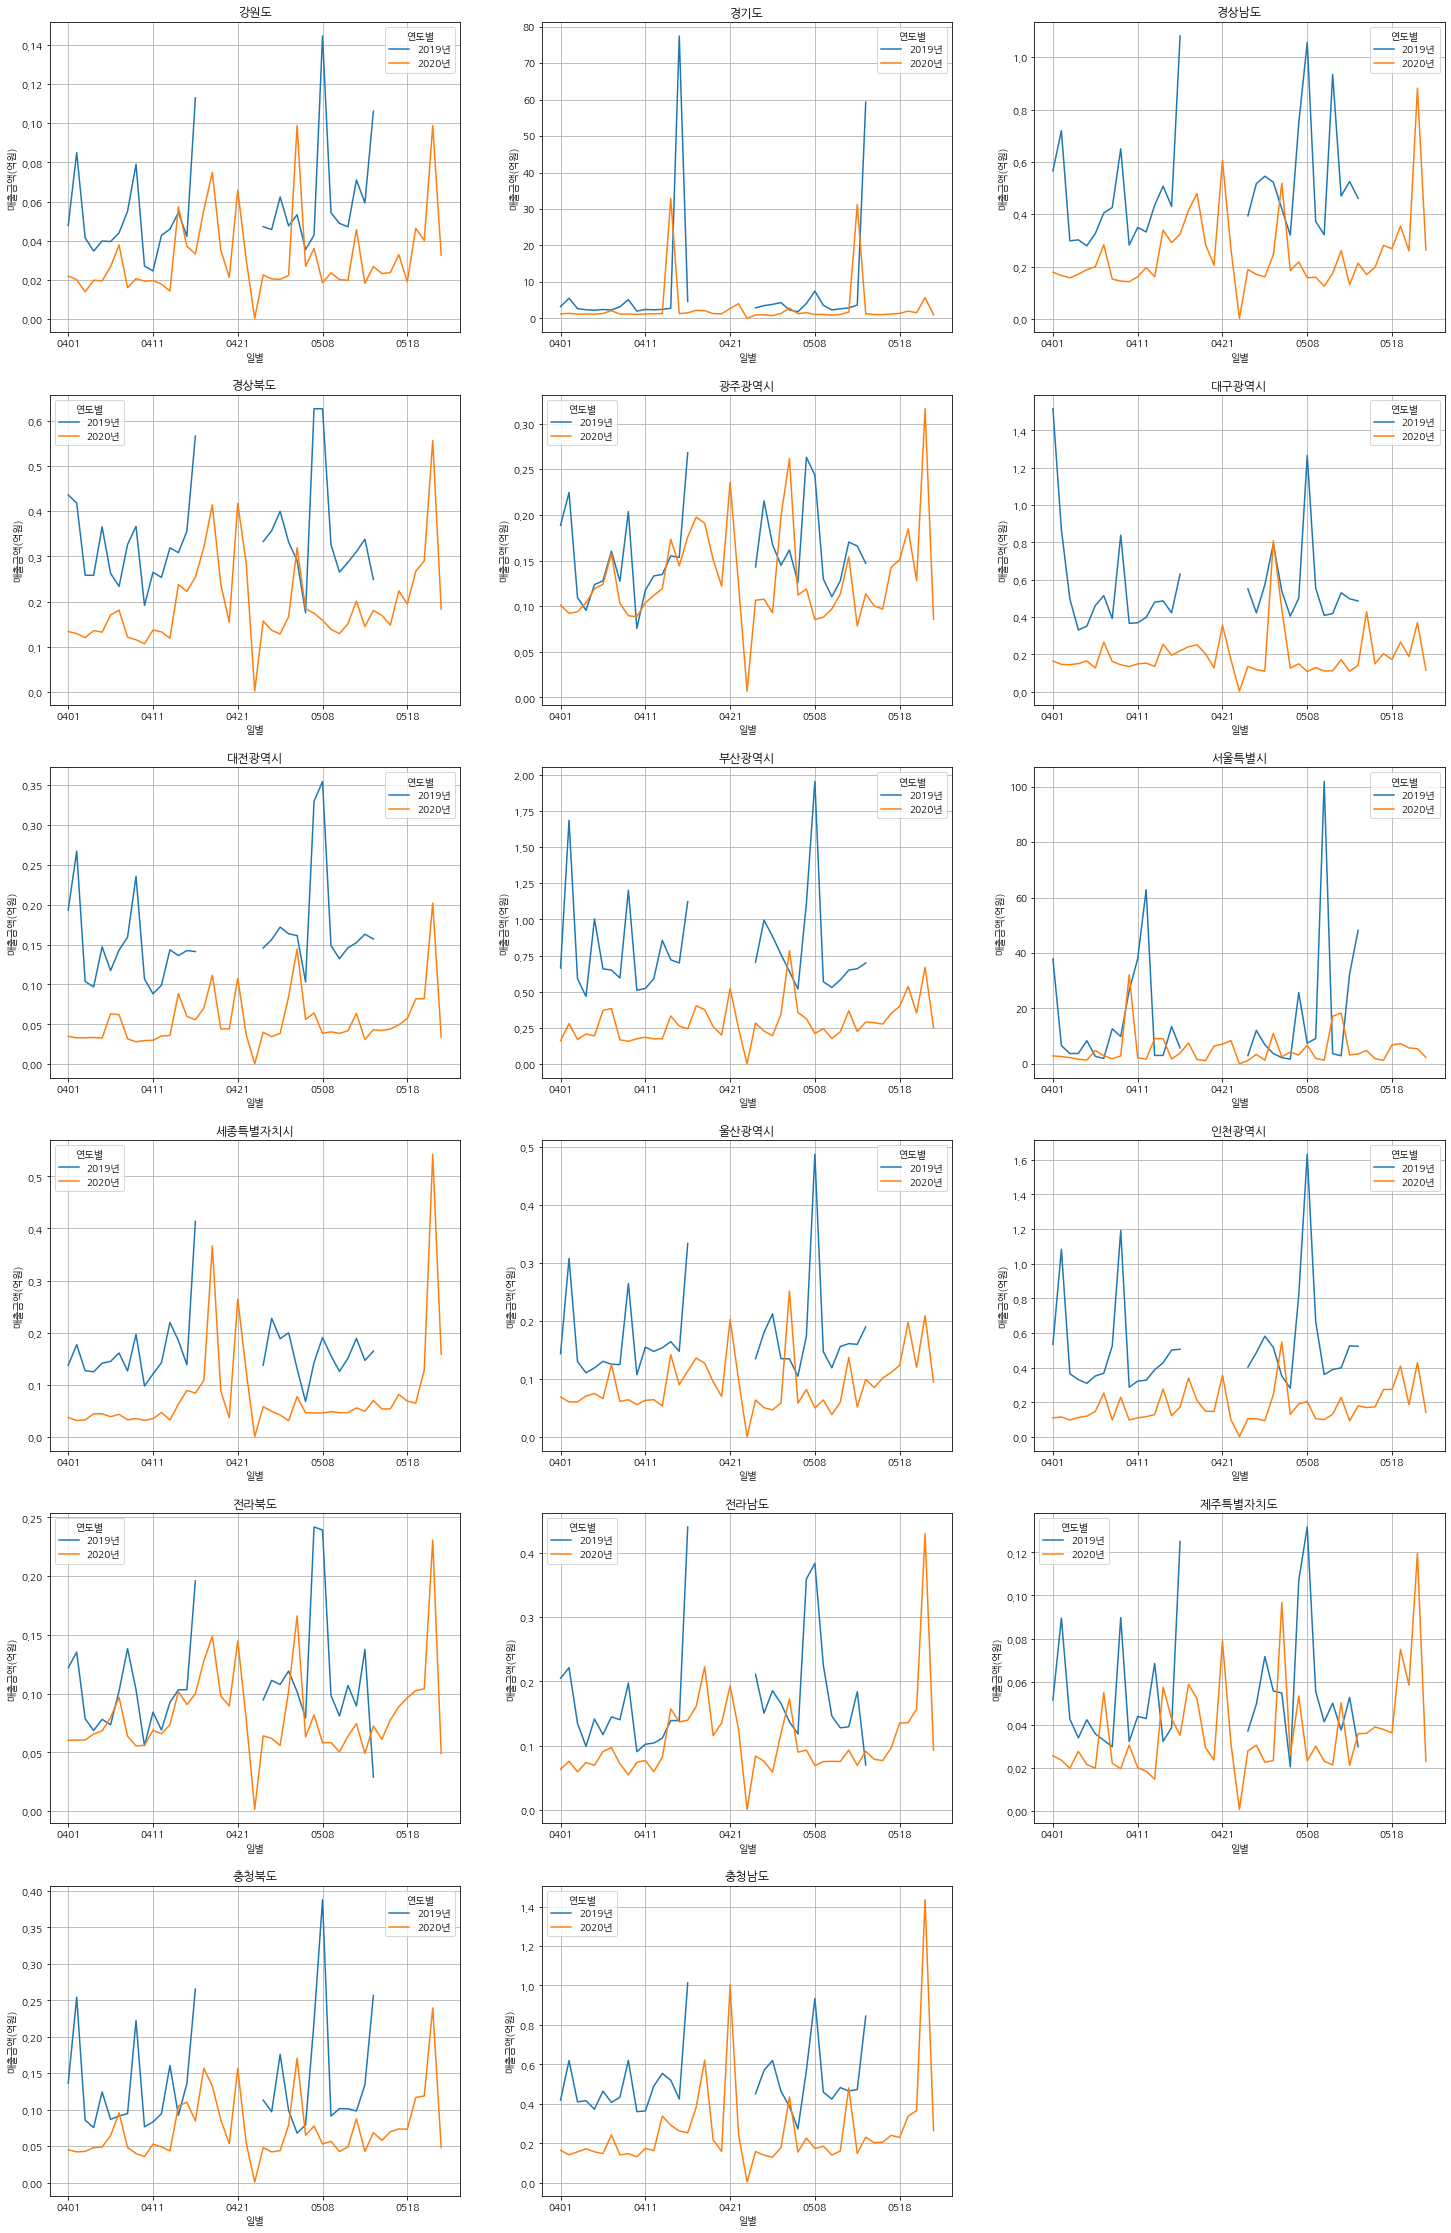

In [455]:
# 지역별 매출액 변화 추이

fig = plt.figure(figsize=(25, 40))
for i in range(0, 17):
    dist = district[i]
    ax = fig.add_subplot(6,3,i+1)
    (BC[BC['행정구역']==dist][['연도별', '일별', '매출금액']].groupby(['연도별', '일별'])['매출금액'].sum()/100000000).unstack().unstack().unstack().plot(ax=ax, grid='on', ylabel='매출금액(억원)').set_title(dist)

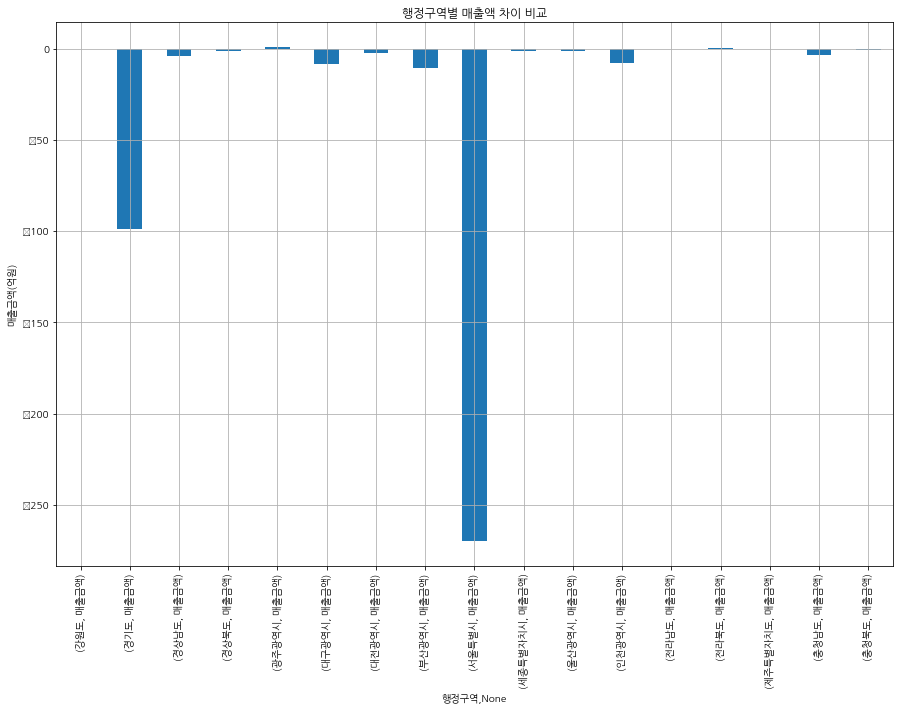

In [458]:
# 행정구역별 매출액 차이 비교
y2019 = BC[BC['연도별'] == '2019년'][['행정구역', '월별', '매출금액']]
y2019 = y2019.groupby(['행정구역']).sum()

y2020 = BC[BC['연도별'] == '2020년'][['행정구역', '월별', '매출금액']]
y2020 = y2020.groupby(['행정구역']).sum()

((y2020-y2019)/100000000).unstack().unstack().unstack().plot(figsize=(15,10), kind='bar', grid='on', ylabel='매출금액(억원)').set_title('행정구역별 매출액 차이 비교')
plt.savefig('./IMG/5. 행정구역별 매출액 차이 비교.png')

# 3) 업종별 매출액 변화 추이

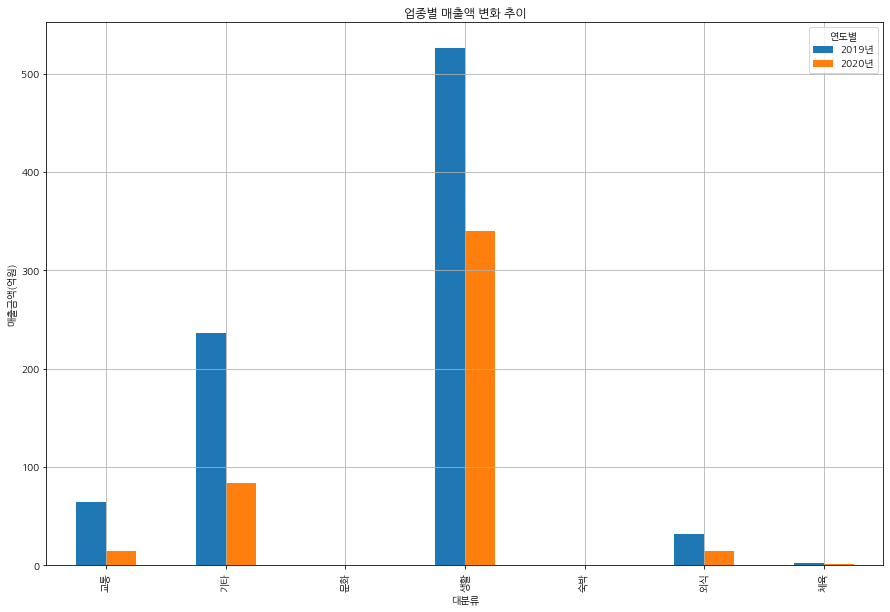

In [460]:
# 2019/2020 매출액 변화 추이
(BC[['연도별','대분류','매출금액']].groupby(['연도별', '대분류'])['매출금액'].sum().unstack().unstack().unstack()/100000000).plot(figsize=(15, 10), grid='on', ylabel='매출금액(억원)', kind='bar').set_title('업종별 매출액 변화 추이')
BC[['연도별','대분류','매출금액']].groupby(['연도별', '대분류'])['매출금액'].sum().unstack().unstack().unstack()/100000000
plt.savefig('./IMG/6. 업종별 매출액 변화 추이.png')

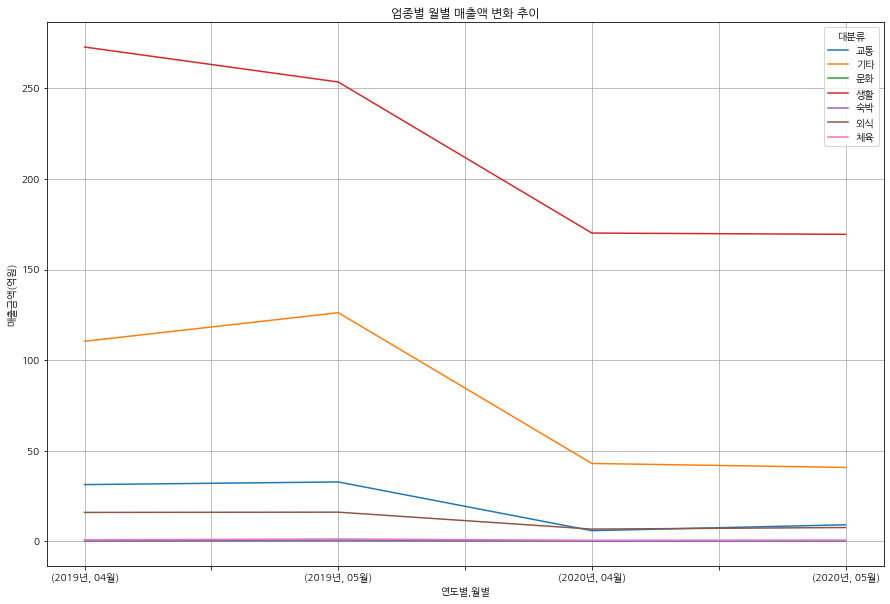

In [462]:
# 2019/2020 월별 매출액 변화 추이
(BC[['연도별', '월별', '대분류', '매출금액']].groupby(['연도별', '월별', '대분류'])['매출금액'].sum().unstack()/100000000).plot(figsize=(15, 10), grid='on', ylabel='매출금액(억원)').set_title('업종별 월별 매출액 변화 추이')
BC[['연도별', '월별', '대분류', '매출금액']].groupby(['연도별', '월별', '대분류'])['매출금액'].sum().unstack()/100000000
plt.savefig('./IMG/7. 업종별 월별 매출액 변화 추이.png')

# 4) 행정구역별 업종 매출액 변화 추이

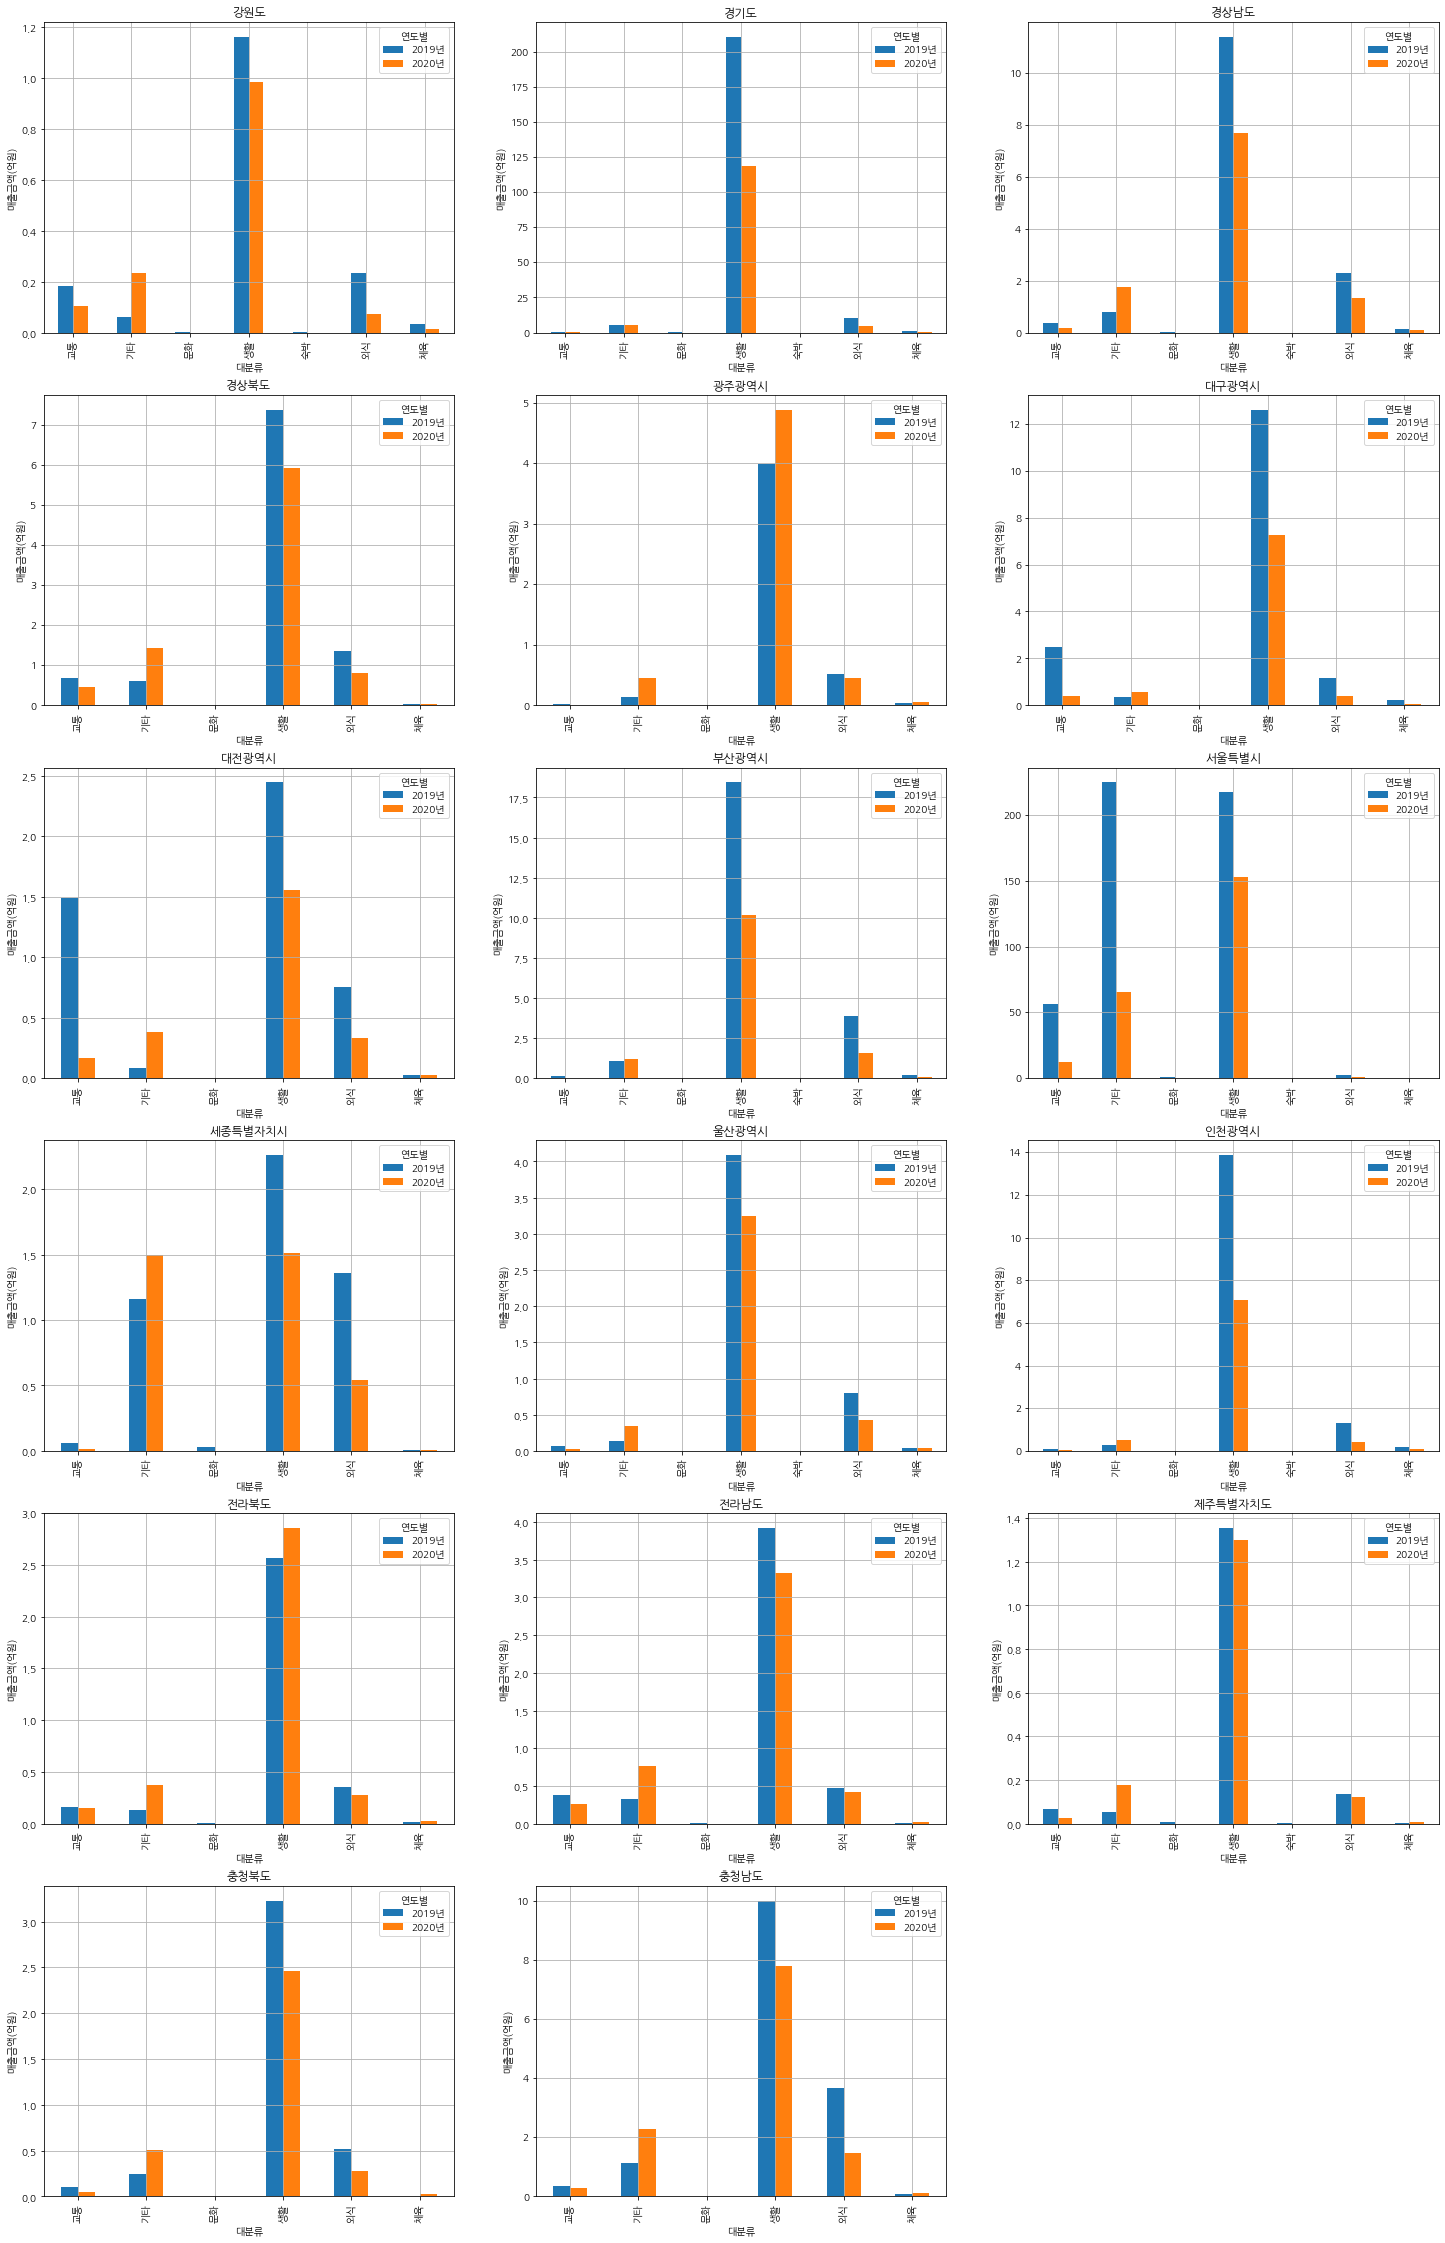

In [465]:
fig = plt.figure(figsize=(25, 40))
for i in range(0, 17):
    dist = district[i]
    ax = fig.add_subplot(6,3,i+1)
    (BC[BC['행정구역']==dist][['연도별', '대분류', '매출금액']].groupby(['연도별', '대분류'])['매출금액'].sum()/100000000).unstack().unstack().unstack().plot(ax=ax, grid='on', ylabel='매출금액(억원)', kind='bar').set_title(dist)

# 5) 생활부문 매출액 중분류 변화 추이

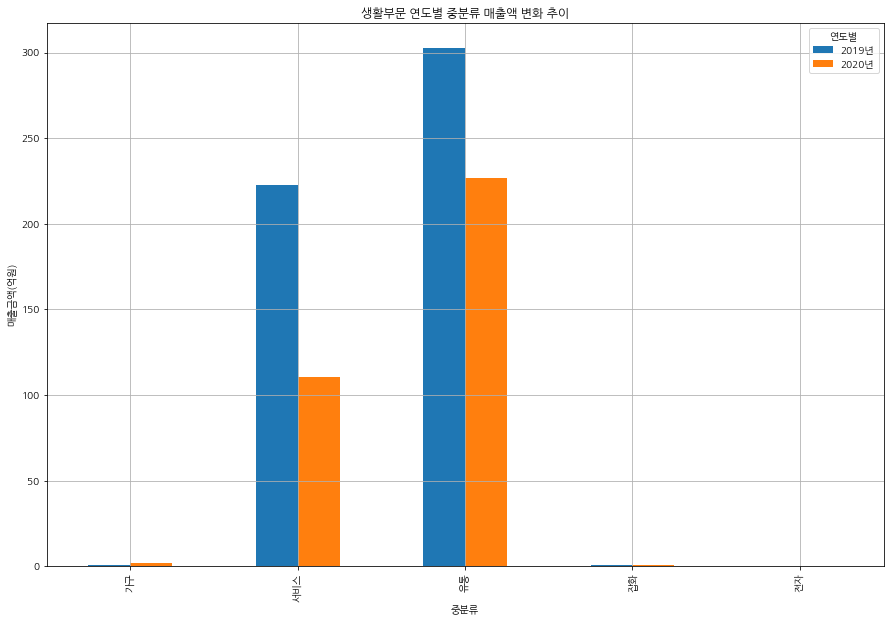

In [466]:
# 생활부문 연도별 중분류 매출액 변화 추이
(BC[BC['대분류']=='생활'][['중분류', '연도별', '매출금액']].groupby(['중분류', '연도별'])['매출금액'].sum().unstack()/100000000).plot(figsize=(15,10), kind='bar', grid='on', ylabel='매출금액(억원)').set_title('생활부문 연도별 중분류 매출액 변화 추이')
BC[BC['대분류']=='생활'][['중분류', '연도별', '매출금액']].groupby(['중분류', '연도별'])['매출금액'].sum().unstack()/100000000
plt.savefig('./IMG/9. 생활부문 연도별 중분류 매출액 변화 추이.png')

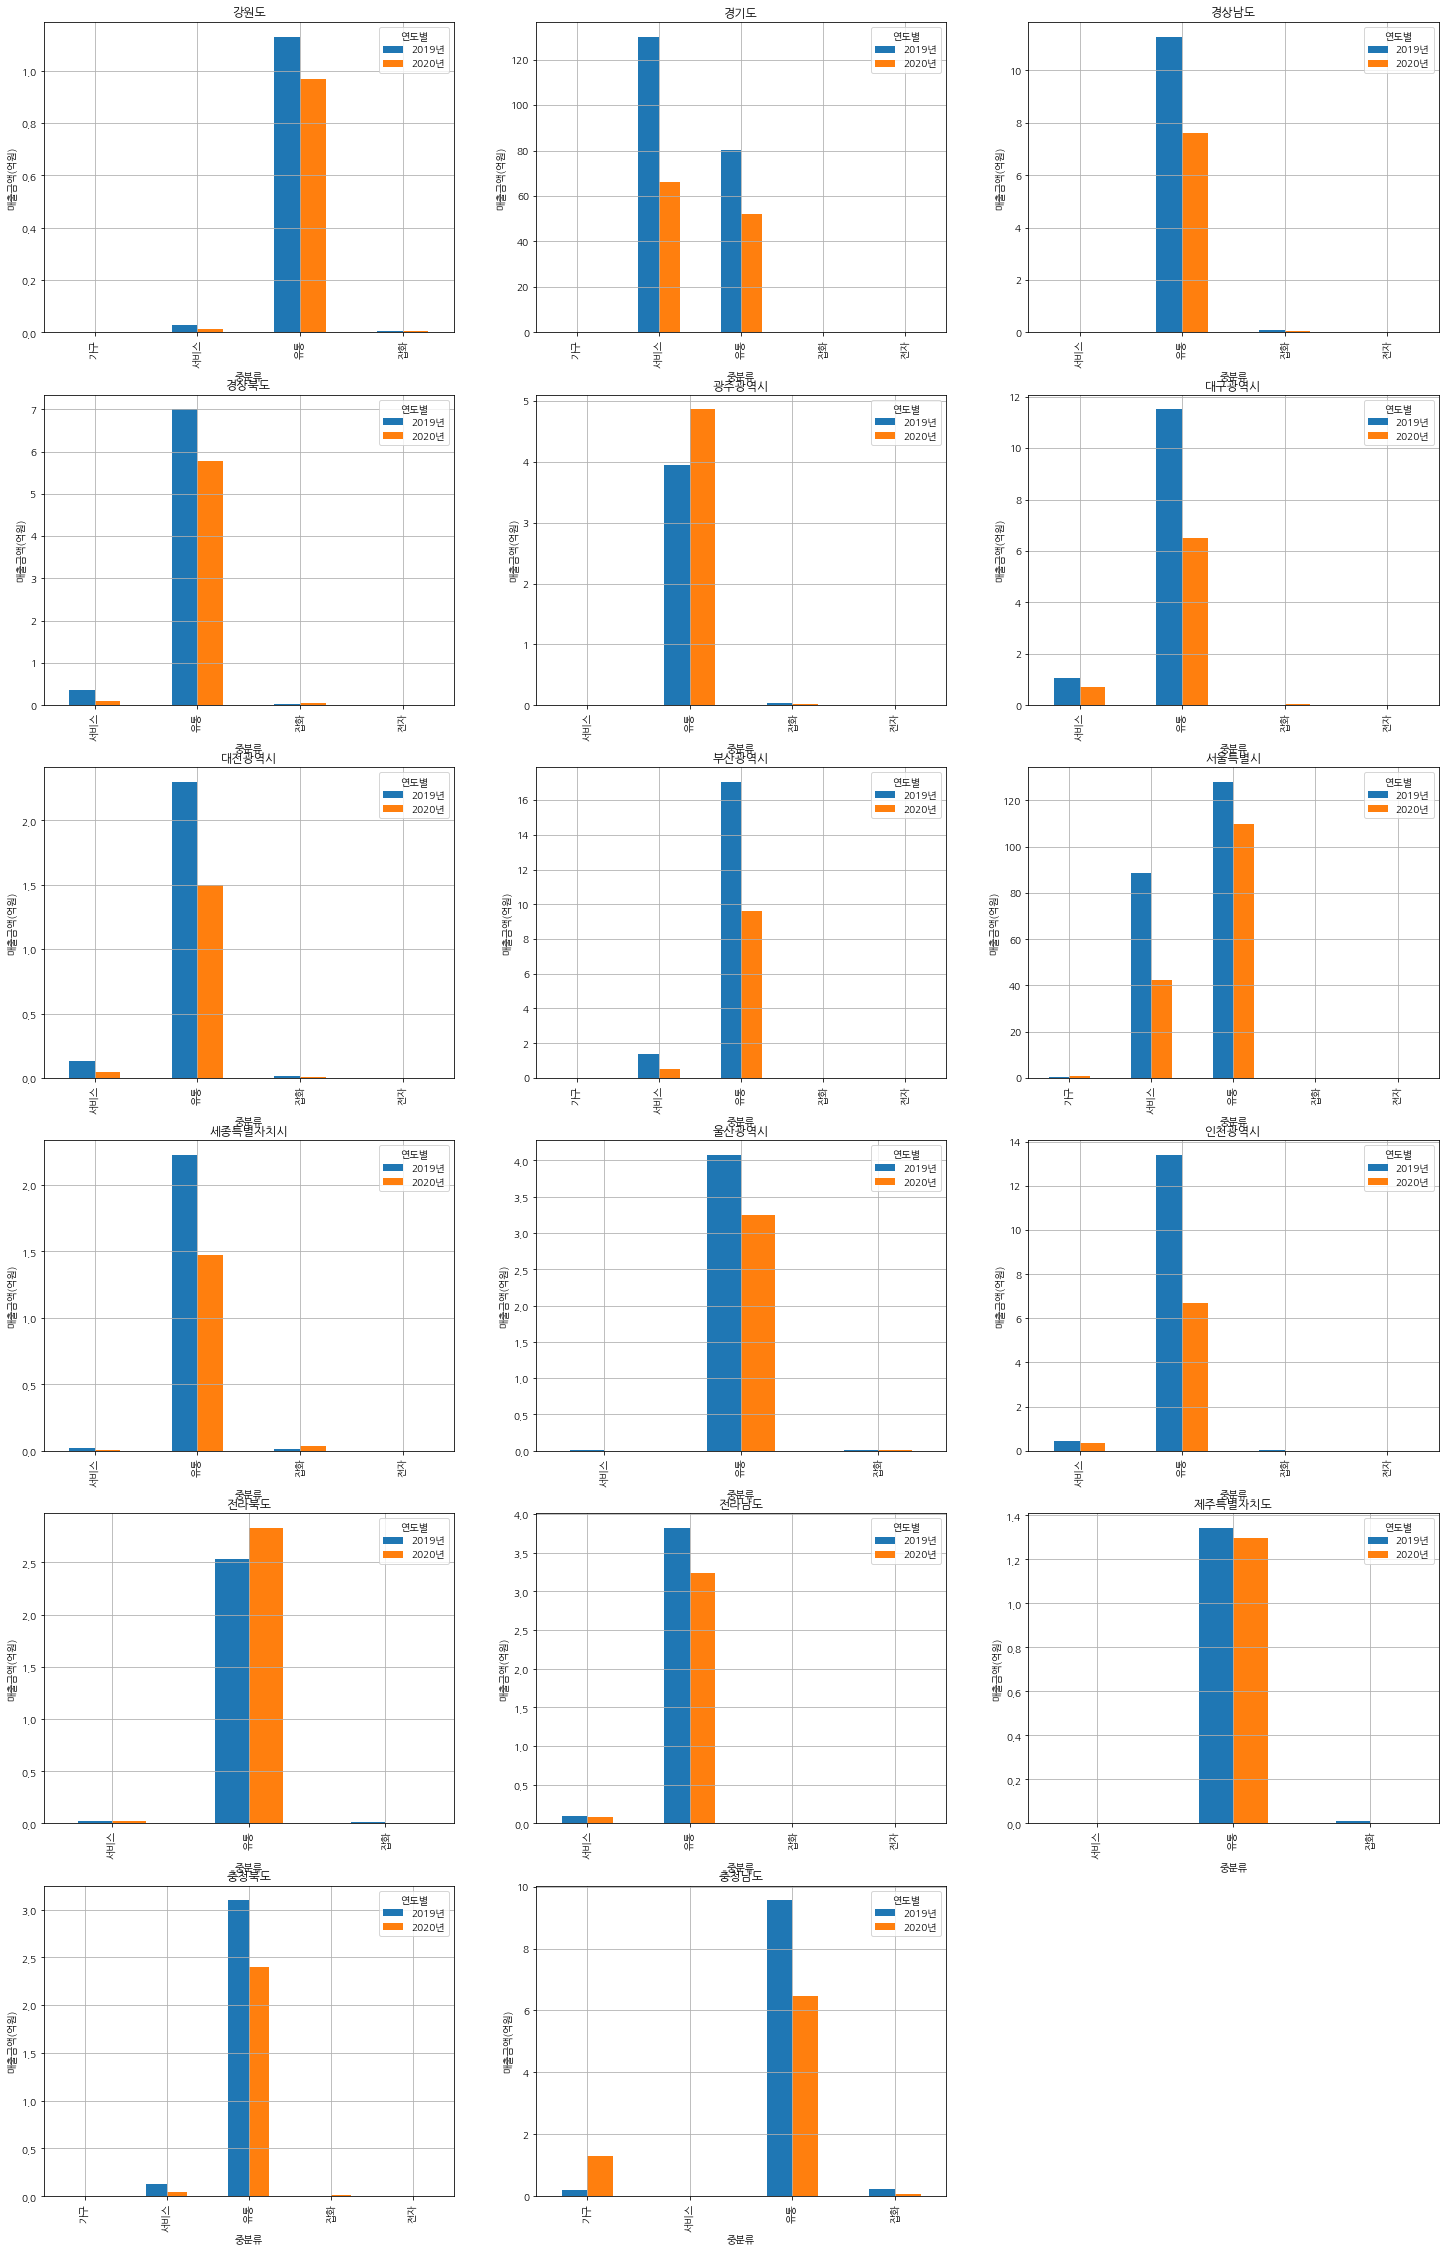

In [526]:
# 생활부문 행정구역별 중분류 연도별 매출액 변화 추이

life = BC[BC['대분류']=='생활'][['행정구역', '중분류', '세부업종명', '연도별', '매출금액']]

fig = plt.figure(figsize=(25, 40))
for i in range(0, 17):
    dist = district[i]
    ax = fig.add_subplot(6,3,i+1)
    (life[life['행정구역']==dist].groupby(['중분류', '연도별'])['매출금액'].sum()/100000000).unstack().plot(ax=ax, kind='bar', ylabel='매출금액(억원)', grid='on').set_title(dist)

# 6) 유통부문 세부업종별 매출액 변화 추이

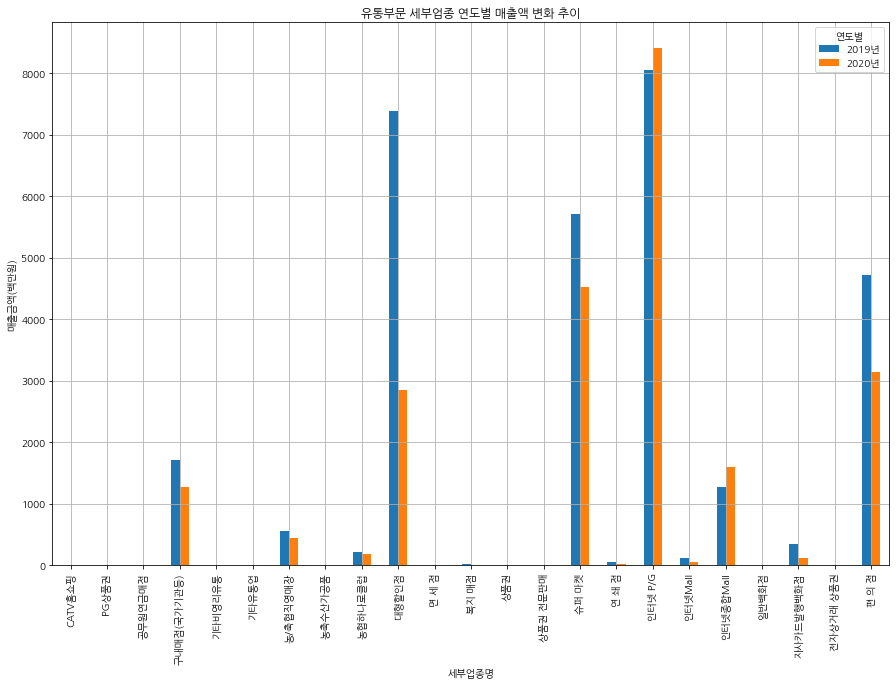

In [471]:
# 유통부문 세부업종 연도별 매출액 변화 추이
circulation = life[life['중분류']=='유통']

(circulation.groupby(['세부업종명', '연도별'])['매출금액'].sum().unstack()/1000000).plot(kind='bar', figsize=(15,10), grid='on', ylabel='매출금액(백만원)').set_title('유통부문 세부업종 연도별 매출액 변화 추이')
(circulation.groupby(['세부업종명', '연도별'])['매출금액'].sum().unstack()/1000000)
plt.savefig('./IMG/11. 유통부문 세부업종 매출액 변화 추이.png')

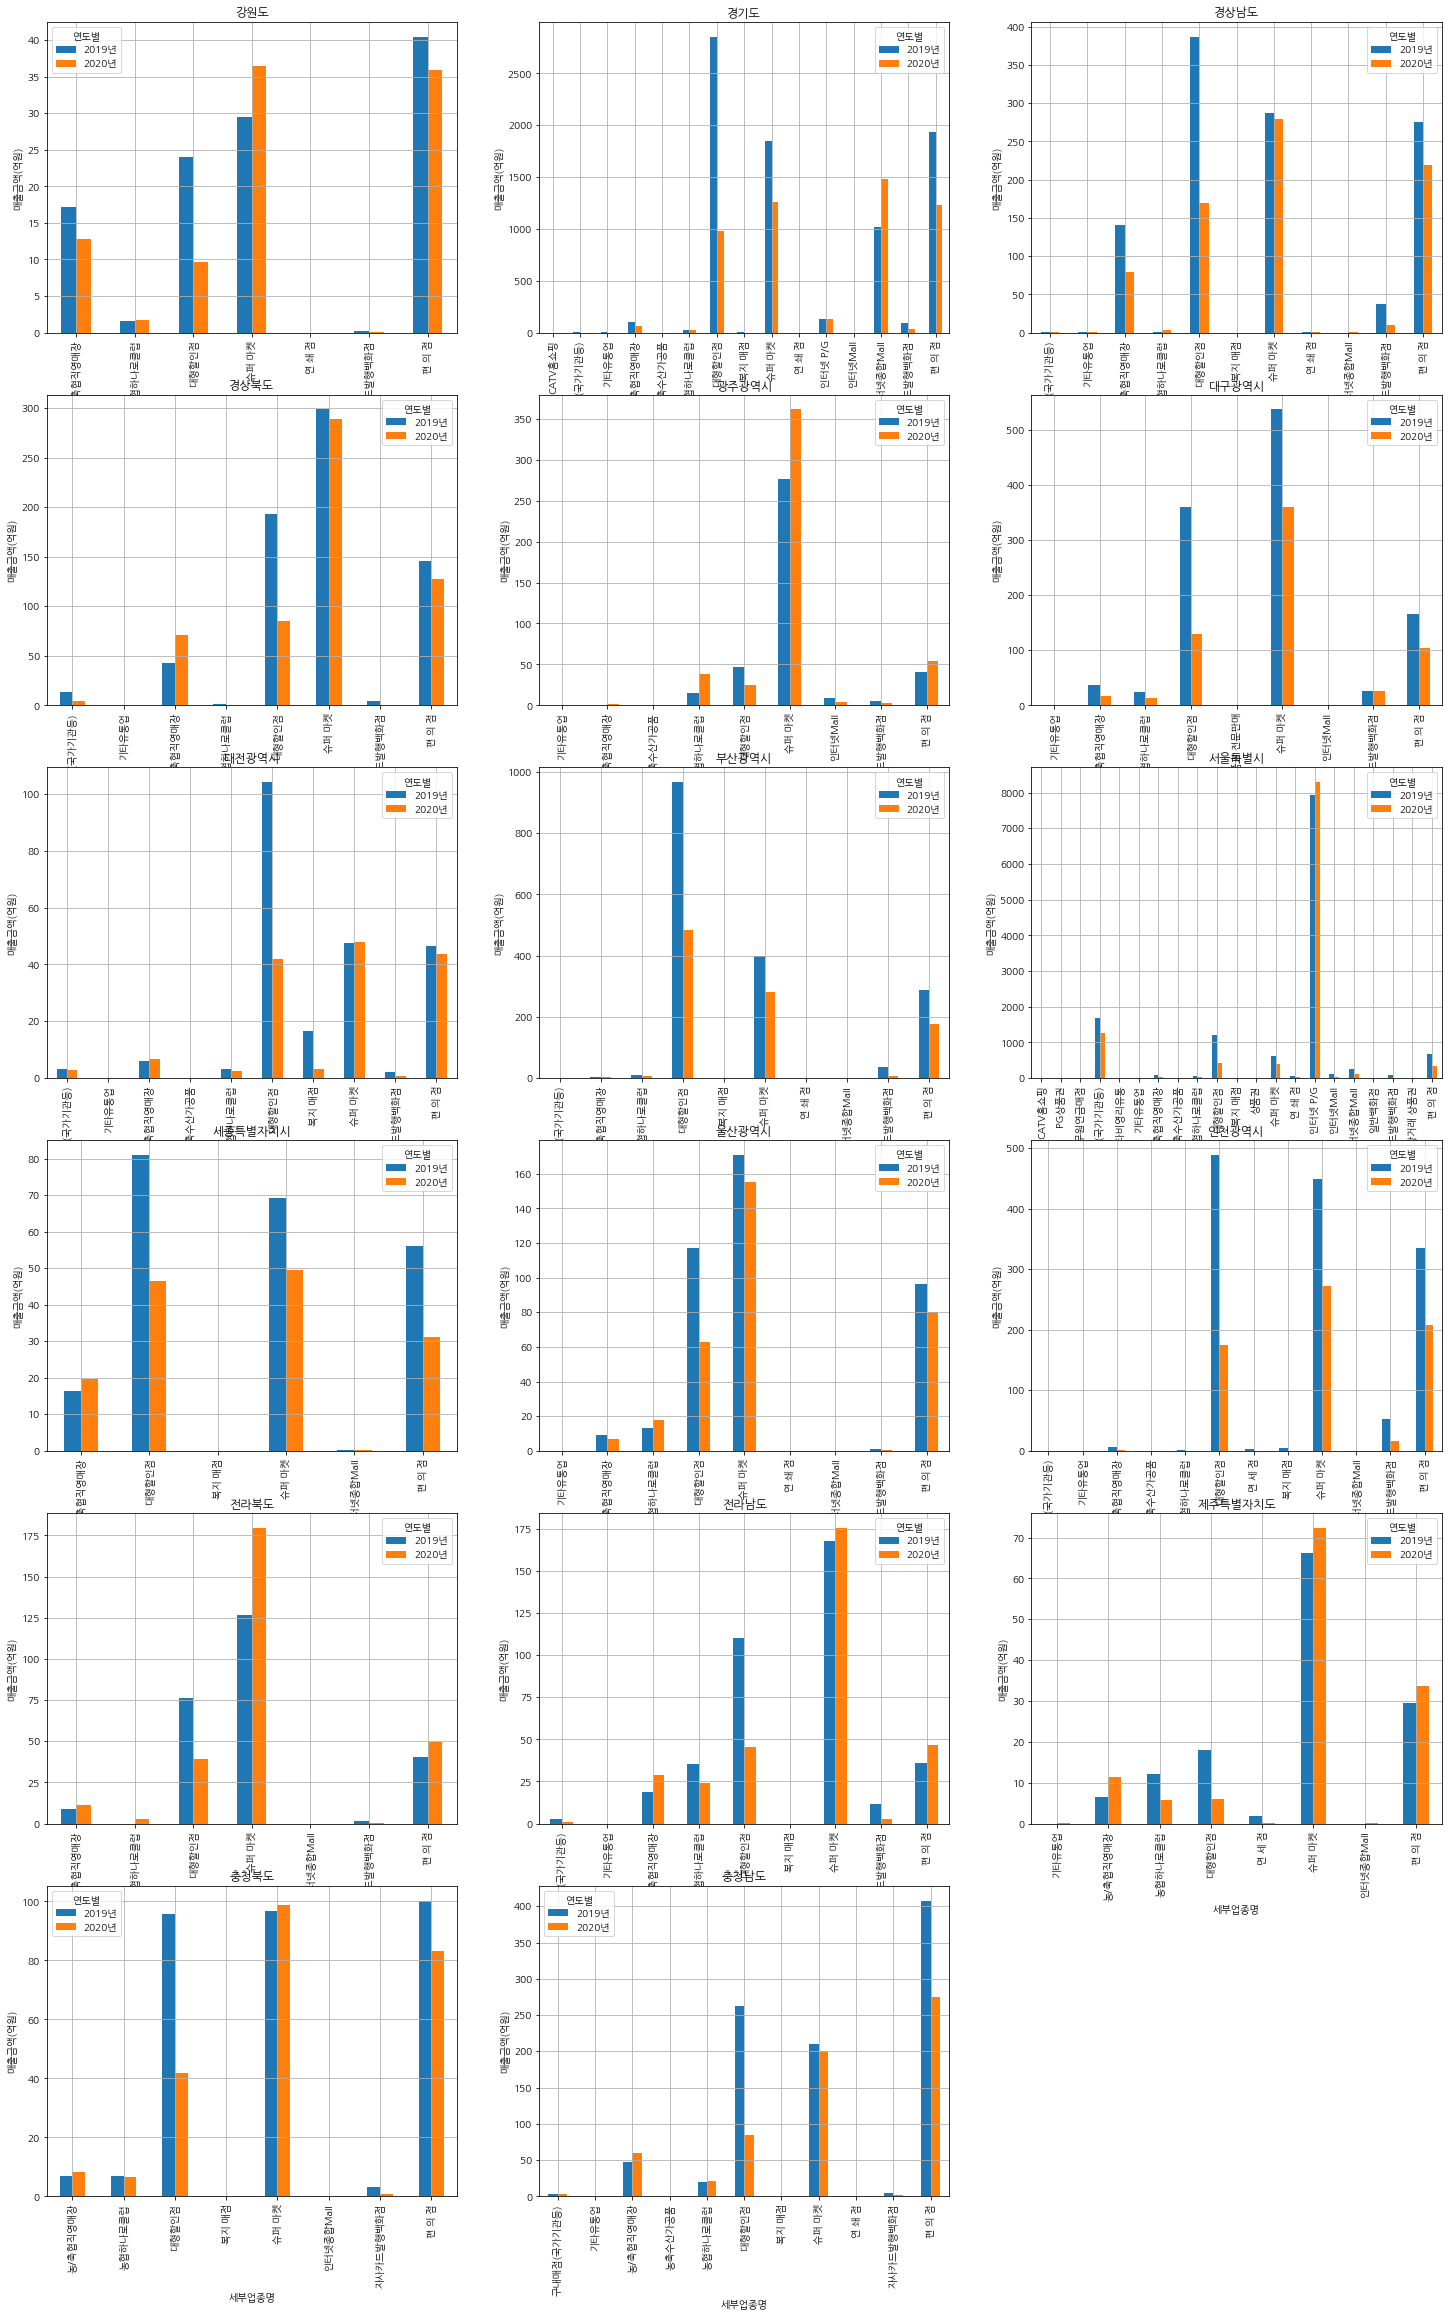

In [524]:
# 유통부문 행정구역별 세부업종 연도별 매출액 변화 추이

life = BC[BC['대분류']=='생활'][['행정구역', '중분류', '세부업종명', '연도별', '매출금액']]

fig = plt.figure(figsize=(25, 40))
for i in range(0, 17):
    dist = district[i]
    ax = fig.add_subplot(6,3,i+1)
    (circulation[circulation['행정구역']==dist].groupby(['세부업종명', '연도별'])['매출금액'].sum()/1000000).unstack().plot(ax=ax, kind='bar', grid='on', ylabel='매출금액(억원)').set_title(dist)